In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
puzzle= [[5, 0, 3, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 3, 0, 0, 0, 0, 0],
        [0, 4, 0, 7, 1, 0, 2, 0, 3],
        [0, 0, 5, 4, 0, 0, 0, 7, 1],
        [0, 0, 4, 2, 0, 1, 8, 0, 0],
        [6, 8, 0, 0, 0, 7, 5, 0, 0],
        [1, 0, 7, 0, 6, 9, 0, 3, 0],
        [0, 0, 0, 0, 0, 4, 0, 0, 6],
        [0, 0, 0, 0, 0, 0, 9, 0, 5]]

puzzle= [[3, 0, 6, 5, 0, 8, 4, 0, 0],
        [5, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 8, 7, 0, 0, 0, 0, 3, 1],
        [0, 0, 3, 0, 1, 0, 0, 8, 0],
        [9, 0, 0, 8, 6, 3, 0, 0, 5],
        [0, 5, 0, 0, 9, 0, 6, 0, 0],
        [1, 3, 0, 0, 0, 0, 2, 5, 0],
        [0, 0, 0, 0, 0, 0, 0, 7, 4],
        [0, 0, 5, 2, 0, 6, 3, 0, 0]]

In [27]:
def showTable(tbl):
    plt.figure(1, figsize=(7, 7))
    tb = plt.table(cellText=puzzle, loc=(0,0), cellLoc='center')

    tc = tb.properties()['child_artists']
    for cell in tc: 

        cell.set_height(1.0/9)
        cell.set_width(1.0/9)
        cell.get_text().set_color('blue')

    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

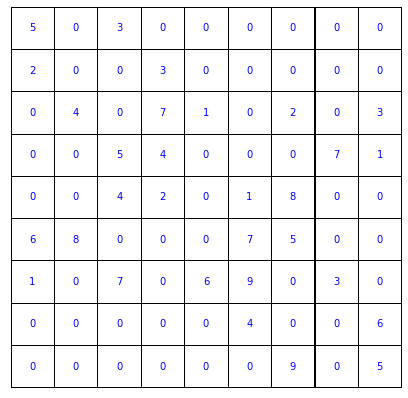

In [28]:
showTable(puzzle)

In [29]:
def index_to_position(index):
    strides = (9,1)
    pos = 0
    for i in range(len(strides)):
        pos = pos + strides[i]*index[i]
    return pos

In [30]:
def index_in_table(position):
    shape=(9,9)
    l1 = list(shape)
    pos = position
    out_index=[0,0]
    strides = (9,1)

    def mul(a):
        mul = 1
        for each in a:
            mul = mul * each
        return mul

    for i in range(0, len(strides)):

        if i == len(l1) - 1:
            val = pos % l1[i]
            out_index[i] = int(val)

        else:
            sublist = l1[i + 1:]
            val = pos / mul(sublist)
            out_index[i] = int(val)
            pos = pos - int(val) * mul(sublist)
    return out_index[0], out_index[1]

In [31]:


class Node:
    def __init__(self,x,y,c):
        self.x_pos = x #x_pos
        self.y_pos = y #y_pos
        self.color = c
        self.available_colors = None
        self.neighbors_restricted = None
    def update_colors(self):
        self.available_colors = {1,2,3,4,5,6,7,8,9}.difference(set([x.color for x in self.neighbor_list]))
        
    '''
    def restricted_for_neighbors(self):
        restricted_list = []
        for each in self.neighbor_list:
            if (each.color == 0):
                for i in each.neighbor_list:
                    if i.color != 0:
                        restricted_list.append(i.color)
        self.neighbors_restricted = set(restricted_list)
      '''              
    def update_node(self):
        self.update_colors()
        # self.restricted_for_neighbors()
        
    

#puzzle=[[0]*9]*9
storage =[]
for i in range (0,9):
    for j in range(0,9):
        c = puzzle[i][j]
        newNode= Node(i,j,c)
        storage.append(newNode)
    

In [32]:

#storage[1].color=1


In [33]:
def update_puzzle():
    for i in range(0,9):
        for j in range(0,9):
            puzzle[i][j]=storage[index_to_position([i,j])].color
            

In [34]:
update_puzzle()

In [35]:
def row_col_adj(x_pos,y_pos):
    neighbor_list=[]
    for i in range(9):
        neighbor_list.append(storage[index_to_position([x_pos,i])])
        neighbor_list.append(storage[index_to_position([i,y_pos])])
    return neighbor_list

def box_adj(x_pos,y_pos):
    neighbor_list=[]
    start_x = x_pos-x_pos%3
    start_y = y_pos - y_pos%3
    for i in range(3):
        for j in range(3):
            neighbor_list.append(storage[index_to_position([i+start_x,j+start_y])])
    return neighbor_list

In [36]:
#Set the Neighbors
for i in range(0,len(storage)):
    x_pos, y_pos = index_in_table(i)
    n1 = row_col_adj(x_pos,y_pos)
    n2 = box_adj(x_pos,y_pos)
    storage[i].neighbor_list = set(n1+n2).difference(set([storage[i]]))

In [37]:
#for i in storage[7].neighbor_list:
  # print(str(i.x_pos)+" "+str(i.y_pos))
#print(len(storage[0].neighbor_list))

In [38]:
# update_available()
i = 1
storage[i].update_node()
# print(storage[9].available_colors)
print(storage[i].available_colors)
print(storage[i].neighbors_restricted)

{1, 9, 6, 7}
None


In [39]:
print(set([x.color for x in storage[4].neighbor_list]))

{0, 1, 3, 5, 6, 7}


In [40]:
queue = []
for each in storage:
    if each.color == 0:
        queue.append(each)
print("The total number of uncolored nodes is: "+str(len(queue)))

The total number of uncolored nodes is: 51


In [41]:
while (len(queue)!=0):
    current = queue.pop(0)
    current.update_colors()
    if len(current.available_colors)== 1:
        current.color = list(current.available_colors)[0]
        print("changed color of: "+str(current.x_pos)+","+str(current.y_pos)+" :"+str(current.color))
        for each in current.neighbor_list:
            each.update_node()
    else:
        queue.append(current)
        
    

changed color of: 4,8 :9
changed color of: 5,3 :9
changed color of: 5,4 :3
changed color of: 6,6 :4
changed color of: 3,4 :8
changed color of: 3,5 :6
changed color of: 3,6 :3
changed color of: 4,4 :5
changed color of: 4,7 :6
changed color of: 3,0 :9
changed color of: 3,1 :2
changed color of: 5,2 :1
changed color of: 6,1 :5
changed color of: 6,3 :8
changed color of: 6,8 :2
changed color of: 8,3 :1
changed color of: 8,7 :8
changed color of: 0,3 :6
changed color of: 2,0 :8
changed color of: 2,5 :5
changed color of: 2,7 :9
changed color of: 5,8 :4
changed color of: 7,0 :3
changed color of: 7,1 :9
changed color of: 7,3 :5
changed color of: 7,7 :1
changed color of: 8,0 :4
changed color of: 8,1 :6
changed color of: 8,2 :2
changed color of: 8,4 :7
changed color of: 8,5 :3
changed color of: 0,7 :4
changed color of: 1,5 :8
changed color of: 1,7 :5
changed color of: 1,8 :7
changed color of: 2,2 :6
changed color of: 4,0 :7
changed color of: 4,1 :3
changed color of: 5,7 :2
changed color of: 7,2 :8


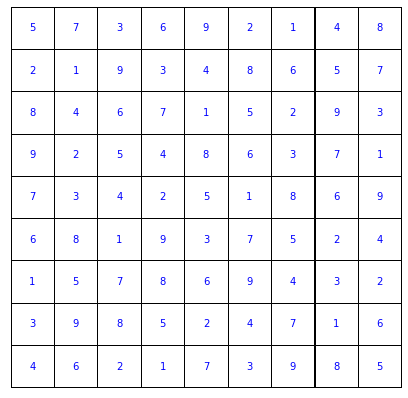

In [42]:
update_puzzle()
showTable(puzzle)